In [1]:
import piplite
await piplite.install('seaborn')
await piplite.install('hvplot')
await piplite.install('plotly')

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os
import pickle
import warnings
warnings.simplefilter("ignore")

In [3]:
import tarfile
import urllib

### Dataset

В нашем датасете присутствует 2 файла с разными типами вина: белое и красное. Объединим два файла в один DataFrame, при этом зададим параметр 'type', который будет указывать на то, какое это вино.

In [4]:
def load_wine_data(name):
    csv_path = os.path.join('./dataset', name + ".csv")
    return pd.read_csv(csv_path, sep=';')

dataRed = load_wine_data("winequality-red")
dataRed['type'] = 'Red'
dataWhite = load_wine_data("winequality-white")
dataWhite['type'] = 'White'

data = pd.concat([dataRed, dataWhite], ignore_index=True)

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [6]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Red


Убедимся, что в наших данных нет пробелов и все данные целые

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
qualit=data['quality'].value_counts().sort_values()
qualit

9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: quality, dtype: int64

In [11]:
%matplotlib inline

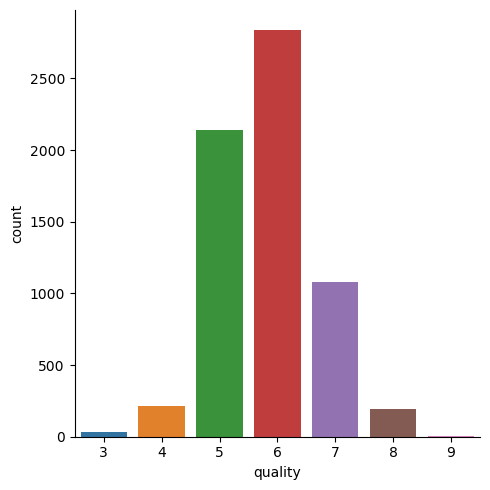

In [12]:
sns.catplot(x='quality', data = data, kind = 'count')

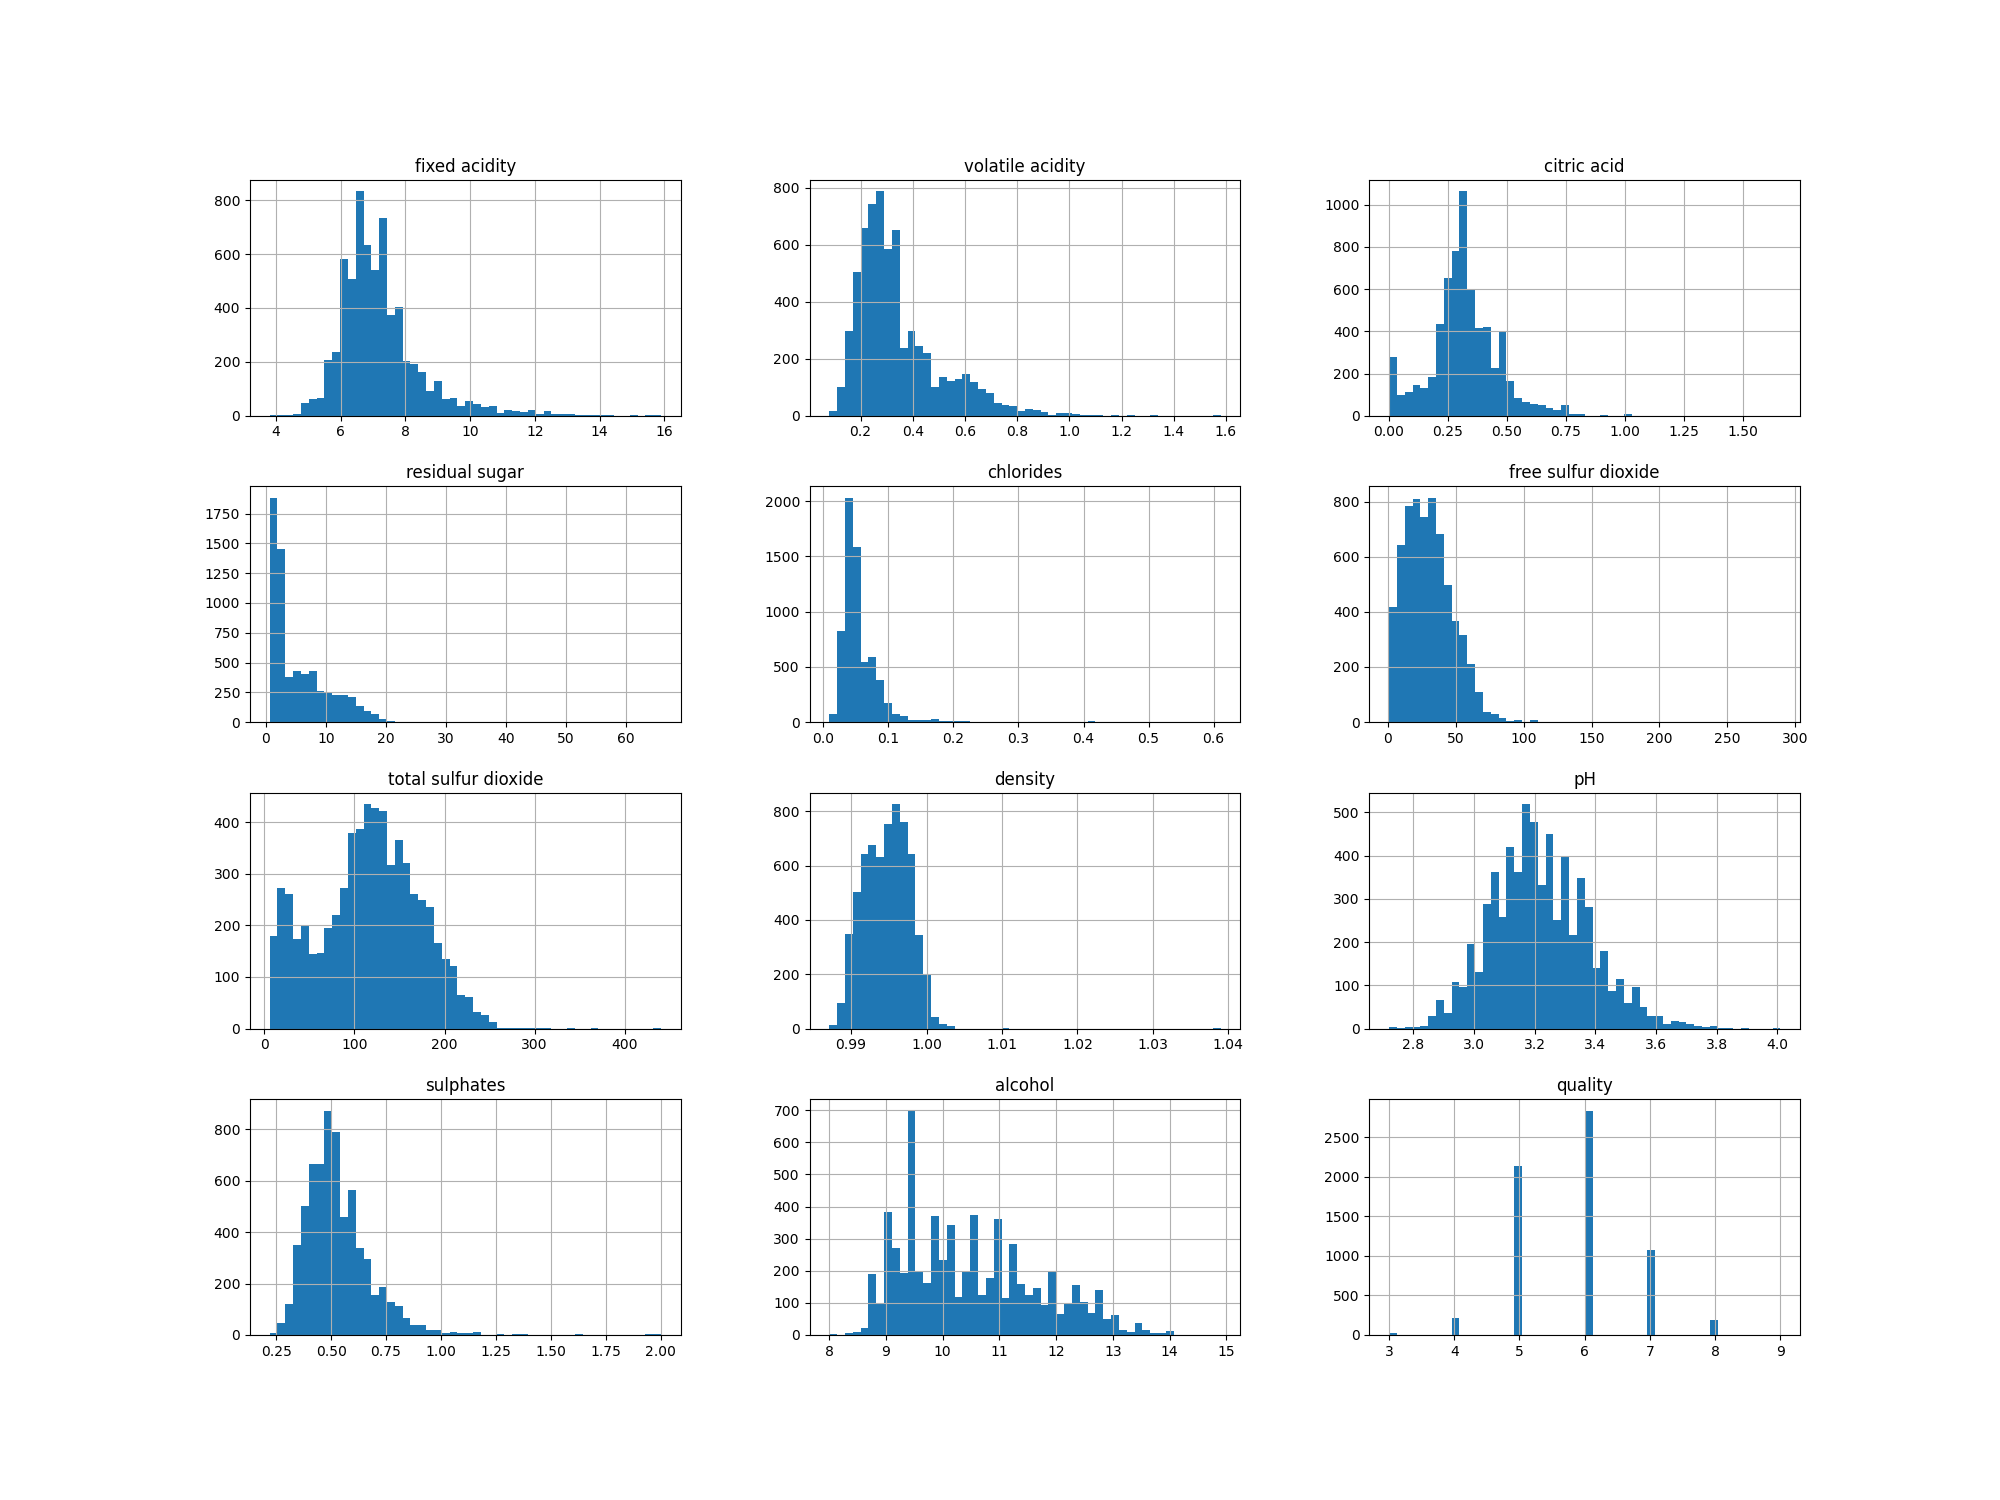

<Figure size 2000x1500 with 0 Axes>

In [13]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [14]:
print("Fixed acidity range:", data["fixed acidity"].min(), data["fixed acidity"].max())
print("Volatile acidity range:", data["volatile acidity"].min(), data["volatile acidity"].max())
print("Citric acid range:", data["citric acid"].min(), data["citric acid"].max())
print("Residual sugar range:", data["residual sugar"].min(), data["residual sugar"].max())
print("Chlorides range:", data["chlorides"].min(), data["chlorides"].max())
print("Free sulfur dioxide range:", data["free sulfur dioxide"].min(), data["free sulfur dioxide"].max())
print("Total sulfur dioxide range:", data["total sulfur dioxide"].min(), data["total sulfur dioxide"].max())
print("Density range:", data["density"].min(), data["density"].max())
print("pH range:", data["pH"].min(), data["pH"].max())
print("Sulphates range:", data["sulphates"].min(), data["sulphates"].max())
print("Alcohol range:", data["alcohol"].min(), data["alcohol"].max())

print("Quality range:", data["quality"].min(), data["quality"].max())

Fixed acidity range: 3.8 15.9
Volatile acidity range: 0.08 1.58
Citric acid range: 0.0 1.66
Residual sugar range: 0.6 65.8
Chlorides range: 0.009 0.611
Free sulfur dioxide range: 1.0 289.0
Total sulfur dioxide range: 6.0 440.0
Density range: 0.98711 1.03898
pH range: 2.72 4.01
Sulphates range: 0.22 2.0
Alcohol range: 8.0 14.9
Quality range: 3 9


Разделим весь наш датасет на тренировочные и тестовые данные

In [15]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(data, test_size = 0.2, random_state = 42 )
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 5197
Test set length: 1300


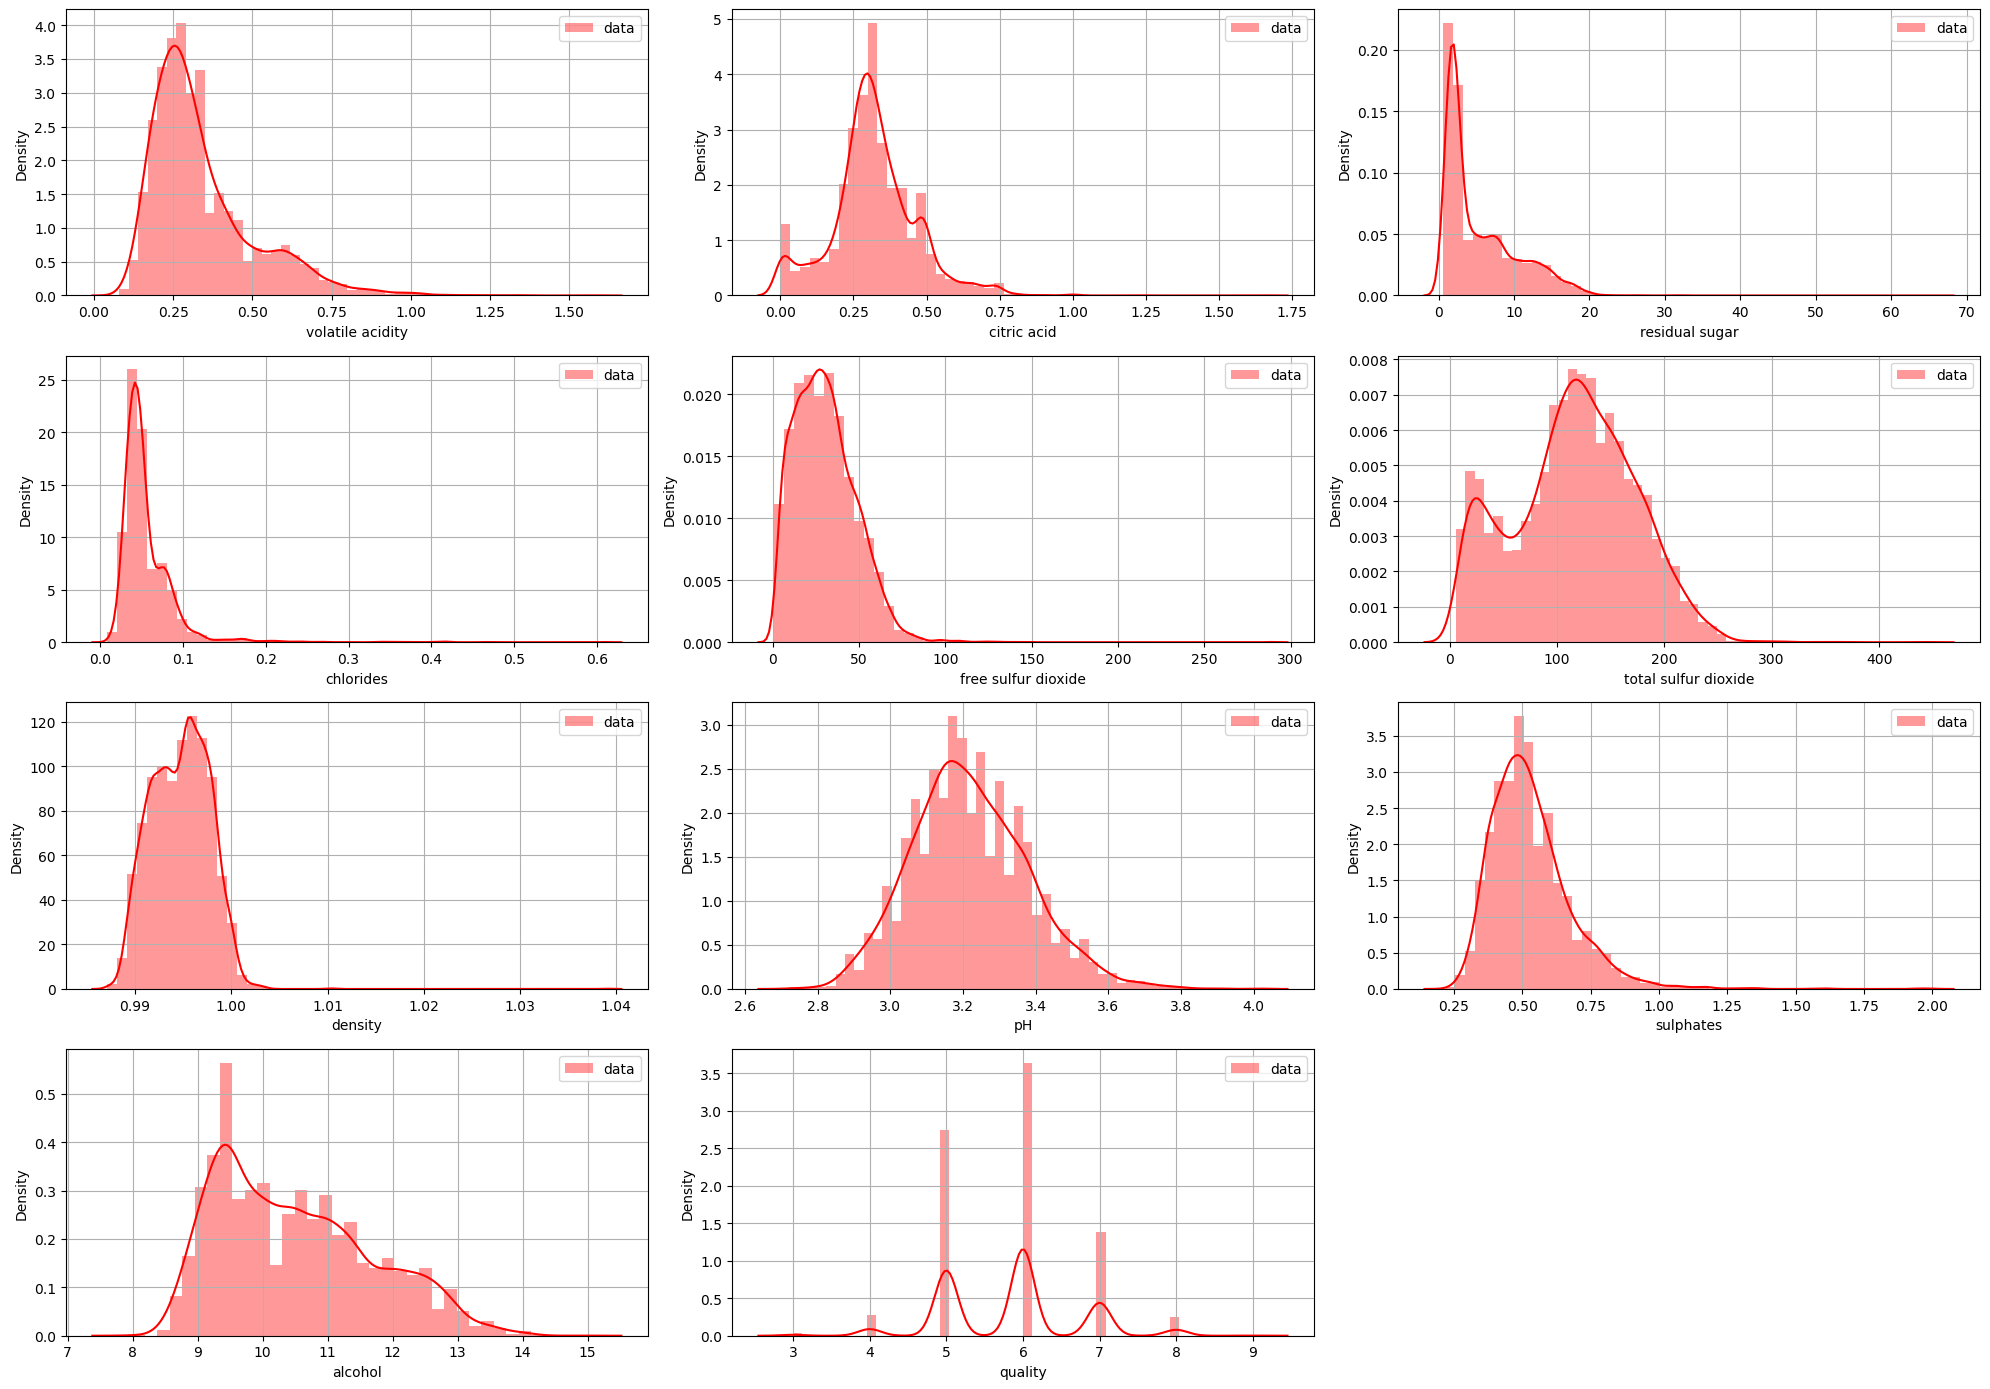

In [16]:
plt.figure(figsize=(20,14))
for i, col in enumerate(list(data.iloc[:,1:-1].columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(data[col],color='r',kde=True, label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

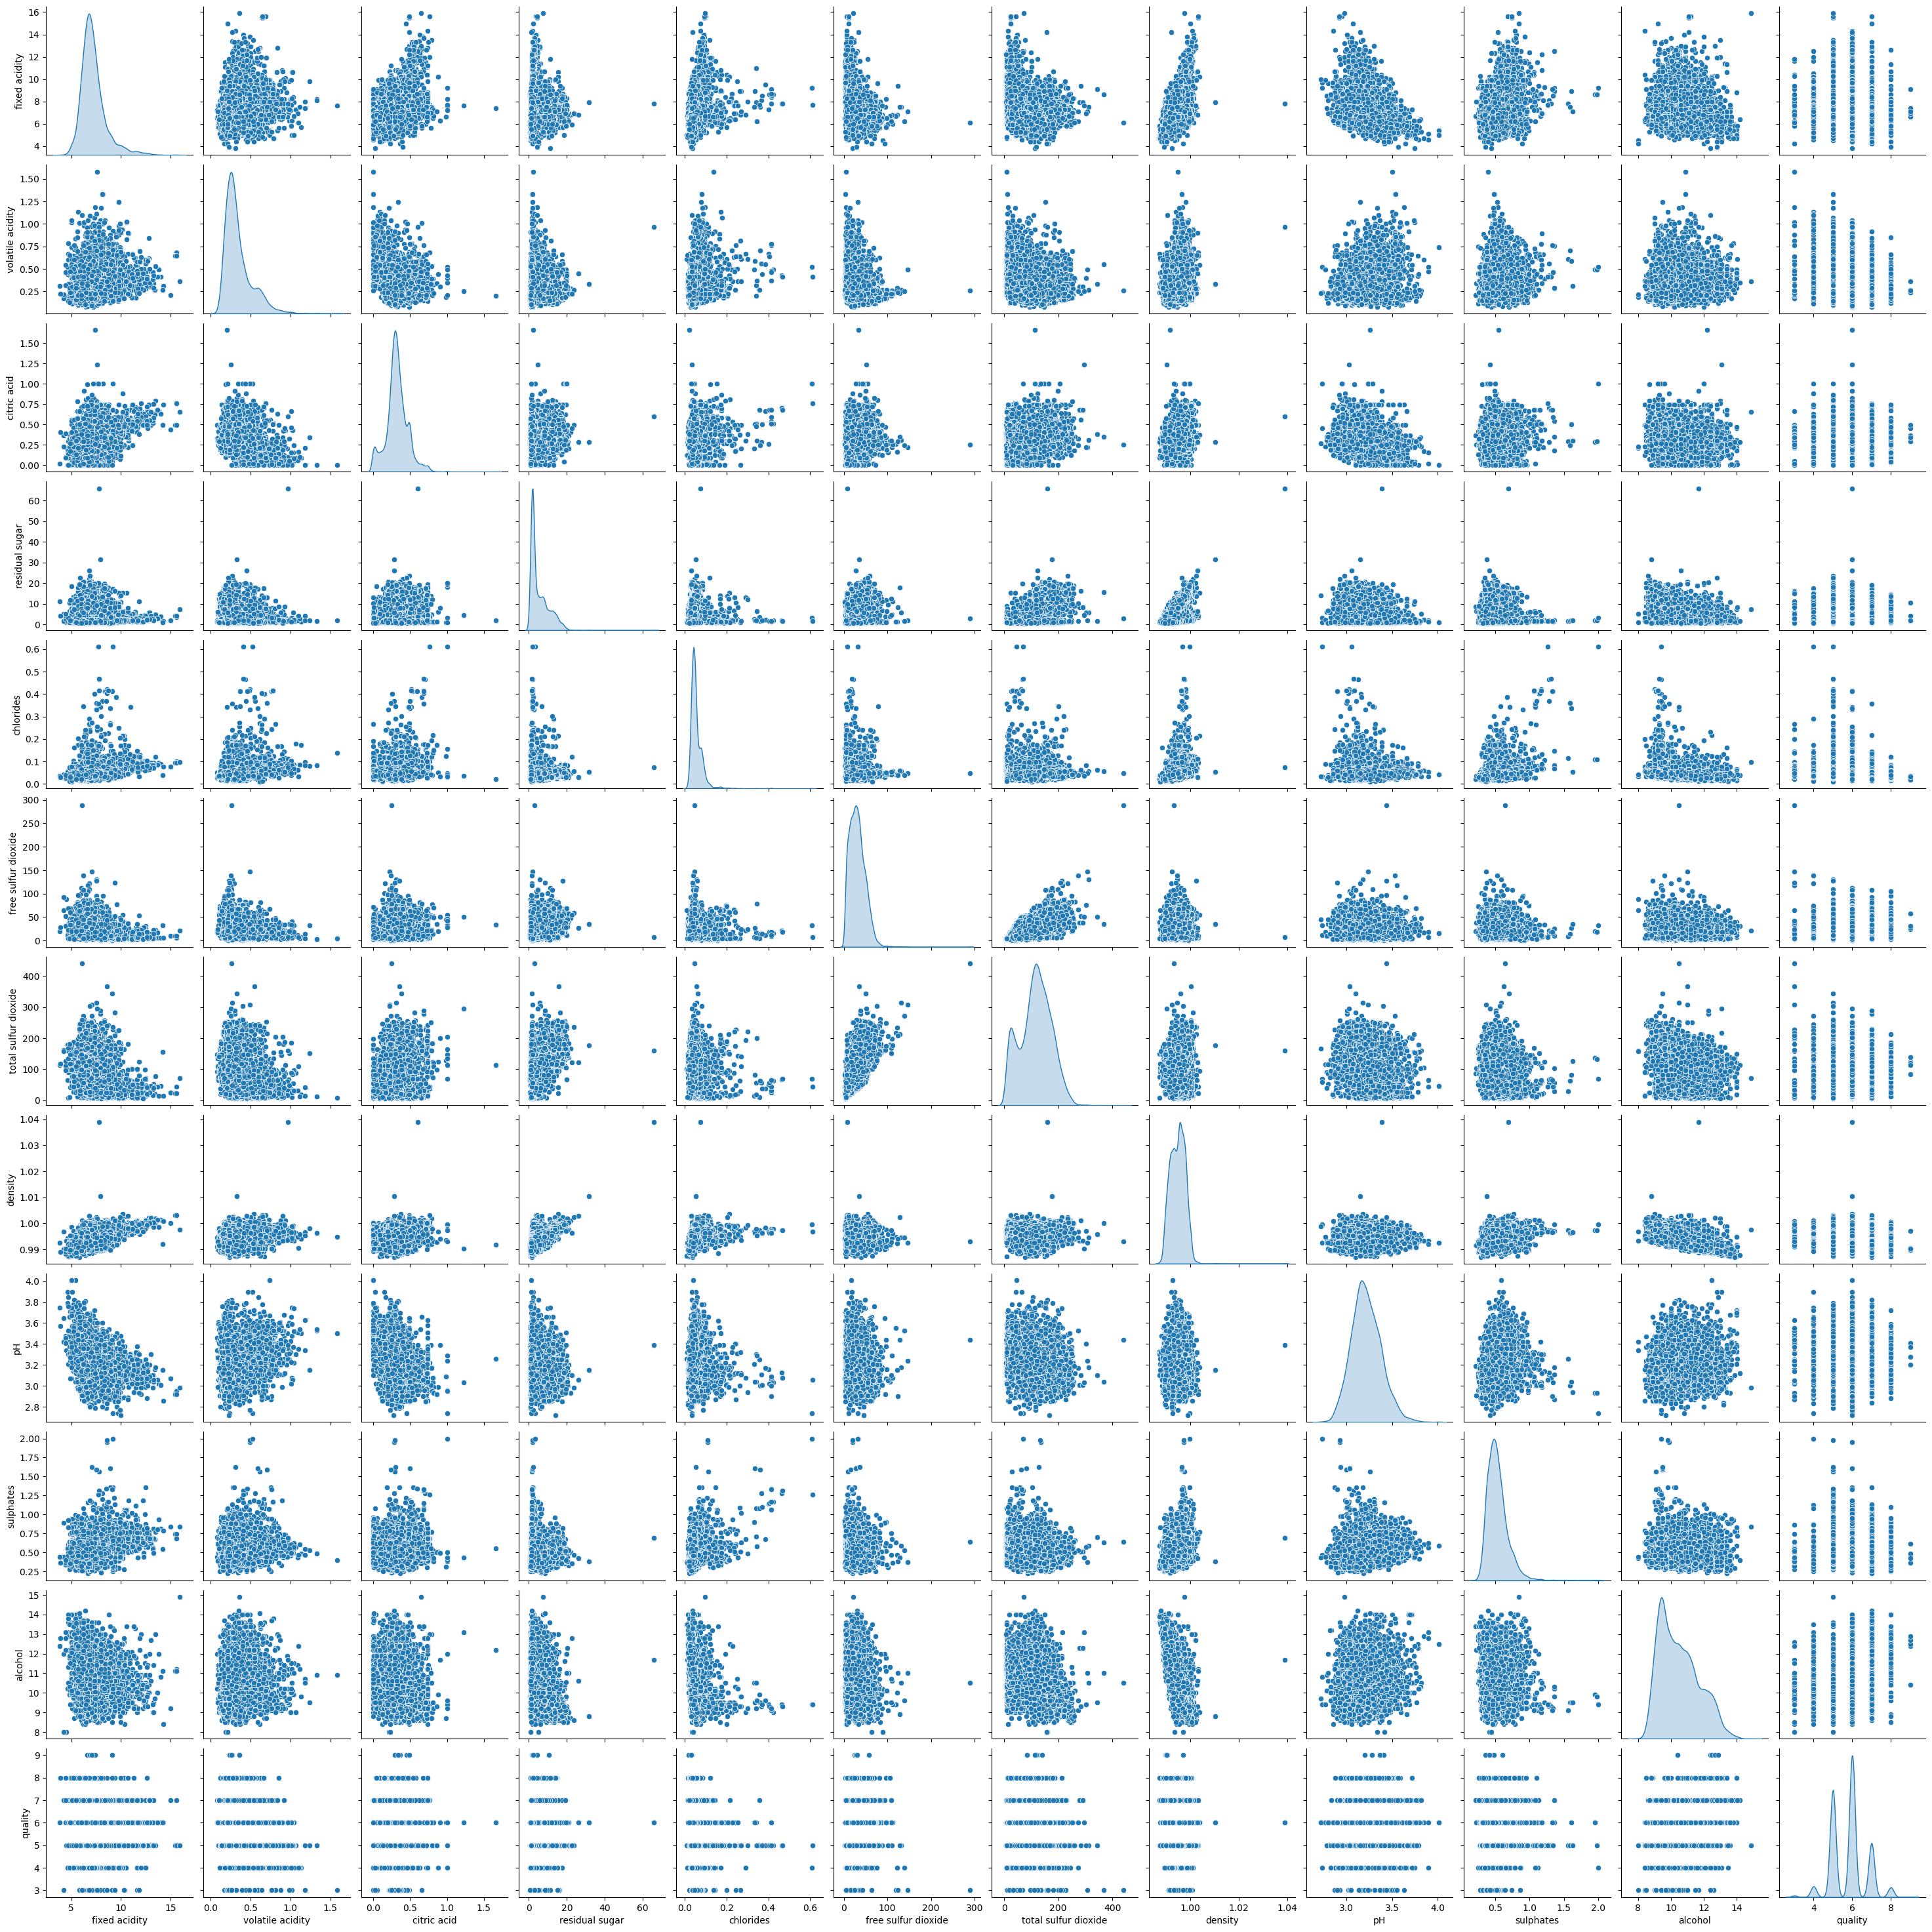

In [17]:
sns.pairplot(data=data,kind='scatter',diag_kind='kde')

Проведем корреляцию данных

In [18]:
correlation = data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Представим визуально скоррелированные данные. Видим, что самая большая корреляция у нас получилась 0.7 и -0.7

<AxesSubplot:>

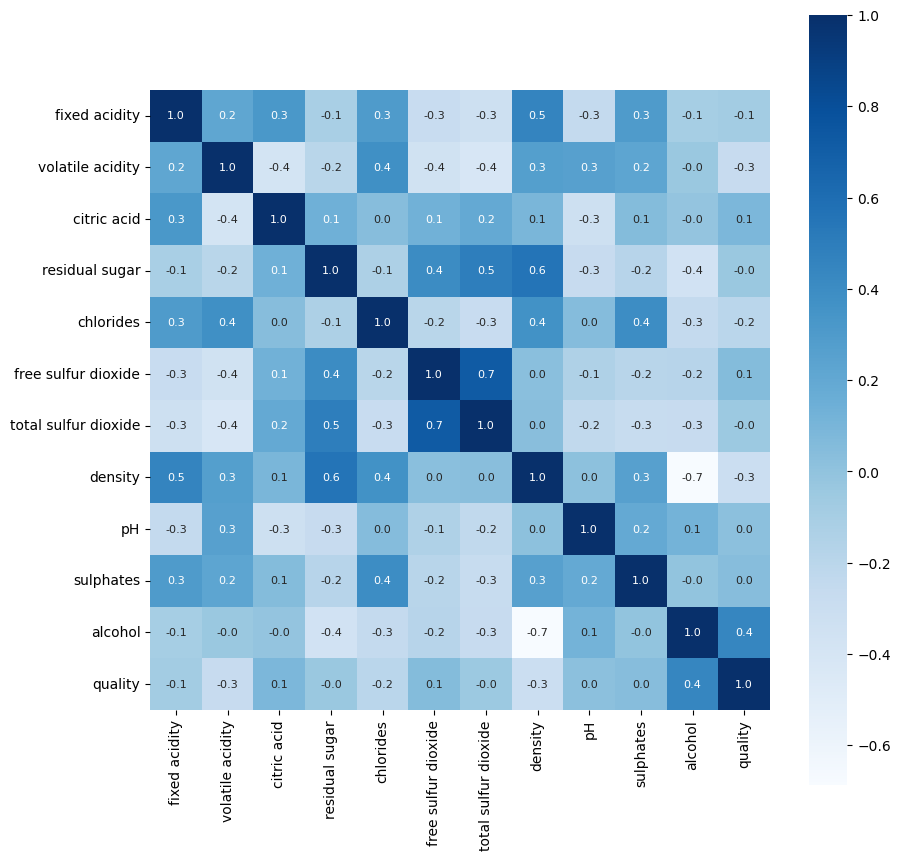

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Удалим из таблицы столбец "quality" и вынесем его в отдельную переменную. Разделим нашу сборку на тренировочные и тестовые наборы и результаты.

In [20]:
X = data.drop('quality',axis=1)

In [21]:
Y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (5197,) (1300,)


### Transformers

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

Определим имеющиеся категориальные и численные признаки. Для этого реализуем сравнение на тип данных

In [24]:
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

Создадим трансформер, который будет преобразовывать признаки в нужный и удобный для нас формат

In [25]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Preprocessing

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Теперь с помощью этого трансформера мы можем быстро получать нужные нам данные. Он закодирует категориальные признаки и приведёт к общему виду числовые признаки датасета

In [27]:
data_num_transformed = preprocessor.fit_transform(X_train)

In [28]:
data_num_transformed

array([[ 7.  ,  0.2 ,  0.33, ..., 10.5 ,  0.  ,  1.  ],
       [ 8.6 ,  0.36,  0.26, ..., 12.  ,  0.  ,  1.  ],
       [ 7.6 ,  0.38,  0.28, ..., 12.6 ,  0.  ,  1.  ],
       ...,
       [ 7.5 ,  0.4 ,  1.  , ..., 12.  ,  0.  ,  1.  ],
       [ 7.1 ,  0.44,  0.62, ...,  8.7 ,  0.  ,  1.  ],
       [ 6.6 ,  0.24,  0.22, ...,  9.4 ,  0.  ,  1.  ]])

### Learning information

Так как нам нужно будет получать одну и ту же информацию множества раз - выделим её в отдельную функцию, чтобы избежать переиспользования кода.

In [29]:
from sklearn.metrics import euclidean_distances, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

def information(model, X, y):
    y_prediction = model.predict(X)
    print('Accuracy score: ', accuracy_score(y, y_prediction))
    print('Recall score: ', recall_score(y, y_prediction))
    print('Precision score: ', precision_score(y, y_prediction))
    print('ROC AUC score: ', roc_auc_score(y, y_prediction))

    try:
        print('Матрица ошибок: ')
        conf_matr = confusion_matrix(y, y_prediction)
        display = ConfusionMatrixDisplay(confusion_matrix=conf_matr)
        display.plot()
        plt.show()
    except ValueError:
        print("Ошибка")
    
    print('График Precision Recall:')
    display = PrecisionRecallDisplay.from_estimator(model, X, y, name="Precision Recall")

    print('График ROC:')
    display = RocCurveDisplay.from_predictions(y_true=y, y_pred=y_prediction, name="ROC")

### Cross-validation

Для кросс-валидации также опишем функцию, которая нам будет выводить информацию в унифицированном формате

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def display_scores(scores):
    print("Оценки:", scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:", scores.std())

### Logistic Regression

In [31]:
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_curve

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV

Создадим модель логистической регрессии

In [32]:
model = LogisticRegression(max_iter=10000)
model.fit(data_num_transformed, Y_train)
y_pred = model.predict(preprocessor.fit_transform(X_test))

Получим информацию об обученной модели

Accuracy score:  0.8269230769230769
Recall score:  0.27450980392156865
Precision score:  0.6363636363636364
ROC AUC score:  0.618116145979923
Матрица ошибок: 


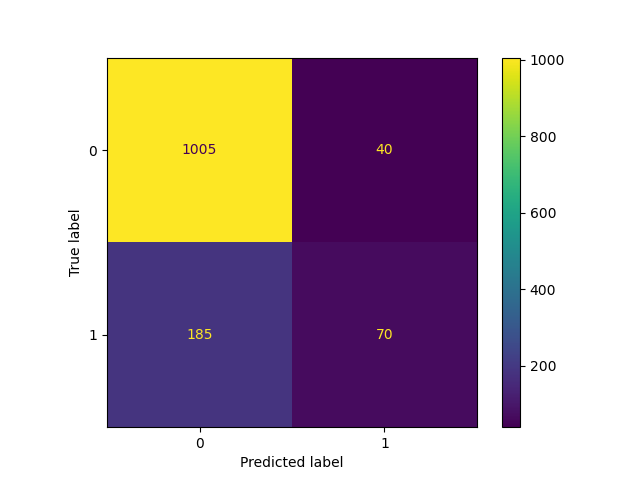

График Precision Recall:
График ROC:


<Figure size 640x480 with 0 Axes>

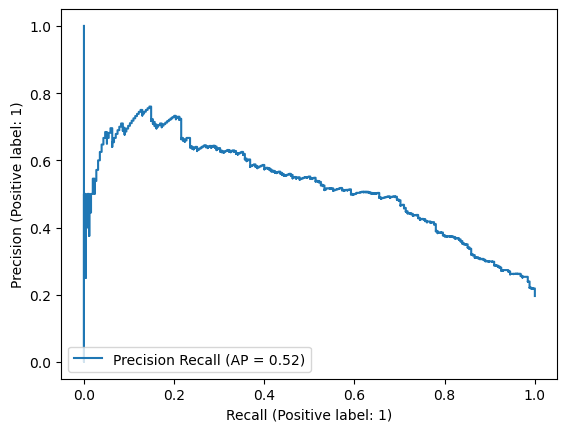

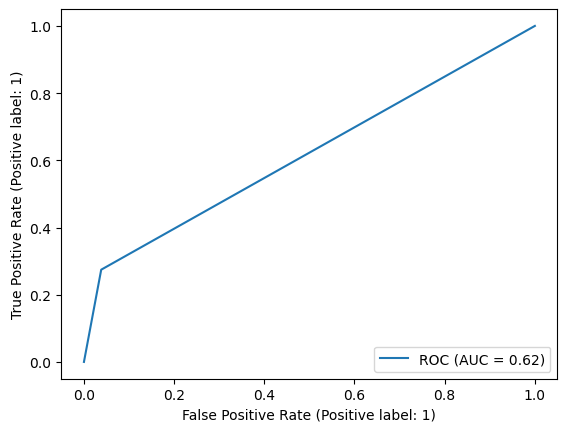

In [33]:
information(model, preprocessor.fit_transform(X_test), Y_test)

Кросс-валидация модели

In [34]:
mse = mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, Y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.41602514716892186
Оценки: [0.41370744 0.43190099 0.43873999 0.43543701 0.43433043]
Среднее: 0.43082317265945347
Стандартное отклонение: 0.008835999087549512


Получим самые оптимальные данные по этой модели

In [35]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_model = GridSearchCV(LogisticRegression(), param_grid=grid_values)

grid_model.fit(data_num_transformed, Y_train)
grid_model_best = grid_model.best_estimator_
print(grid_model_best)

LogisticRegression(C=100)


Сохраним модель в файл .pkl

In [36]:
file = open('models/logistic_regression.pkl', 'wb')
pickle.dump(grid_model_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

### Linear Regression

Создадим модель линейной регрессии

In [37]:
model = LinearRegression()
model.fit(data_num_transformed, Y_train)
y_pred = model.predict(preprocessor.fit_transform(X_test))

Получим ROC-кривую у линейной регрессии

График ROC:


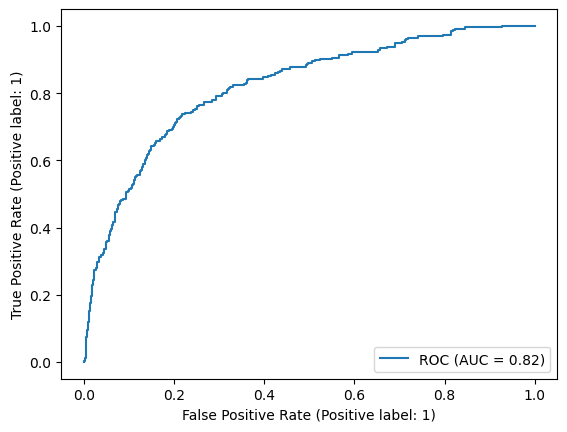

In [38]:
print('График ROC:')
display = RocCurveDisplay.from_predictions(y_true=Y_test, y_pred=y_pred, name="ROC")

Кросс-валидация модели

In [39]:
mse = mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, Y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.35188275886461784
Оценки: [0.36793617 0.35907391 0.35329964 0.35714085 0.35986917]
Среднее: 0.3594639474820458
Стандартное отклонение: 0.004806043723357679


### Random Forest

Создадим модель с рандомным лесом

In [40]:
model = RandomForestClassifier()
model.fit(data_num_transformed, Y_train)
y_pred = model.predict(preprocessor.fit_transform(X_test))

Получим информацию о модели

Accuracy score:  0.9076923076923077
Recall score:  0.6352941176470588
Precision score:  0.8571428571428571
ROC AUC score:  0.8047283985364481
Матрица ошибок: 


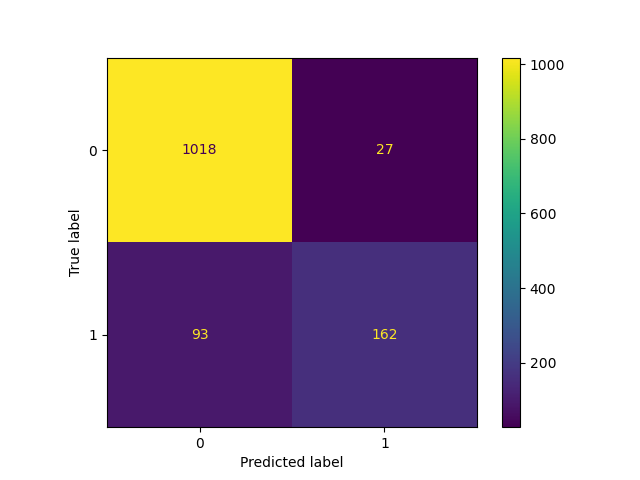

График Precision Recall:
График ROC:


<Figure size 640x480 with 0 Axes>

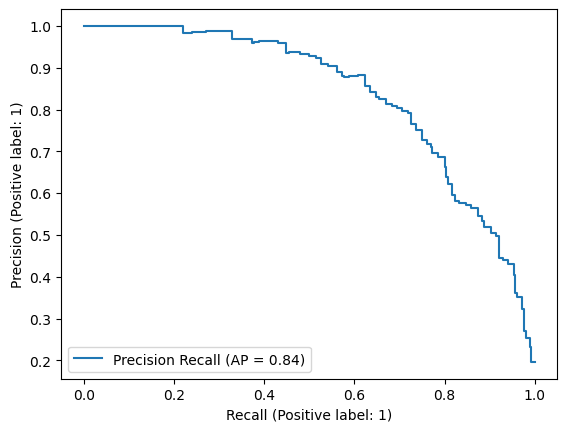

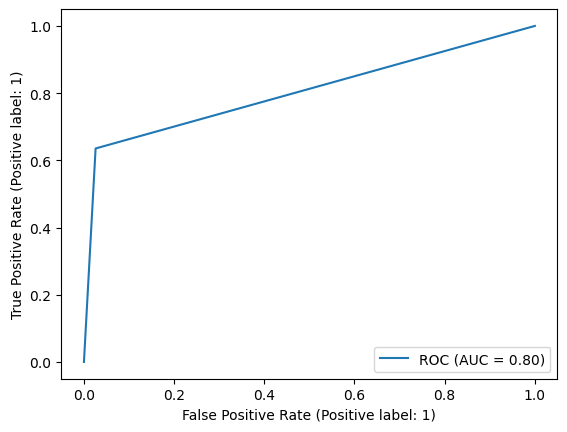

In [41]:
information(model, preprocessor.fit_transform(X_test), Y_test)

Получим наилучшие показатели данной модели

In [42]:
param_grid = [
    {
        'n_estimators':[3,10,30], 'max_features':[2,4,7]
    }, 
    {
        'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]   
    }
]

grid_model = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_model.fit(data_num_transformed, Y_train)
grid_model_best = grid_model.best_estimator_
grid_model_best

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=30)

In [43]:
cv_res = grid_model.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

0.35962168452191756 {'max_features': 2, 'n_estimators': 3}
0.31871916137509665 {'max_features': 2, 'n_estimators': 10}
0.3045290256334438 {'max_features': 2, 'n_estimators': 30}
0.35543352676212564 {'max_features': 4, 'n_estimators': 3}
0.31721479443563133 {'max_features': 4, 'n_estimators': 10}
0.3079675127660802 {'max_features': 4, 'n_estimators': 30}
0.3601253155768272 {'max_features': 7, 'n_estimators': 3}
0.31826910154226457 {'max_features': 7, 'n_estimators': 10}
0.31023993634370745 {'max_features': 7, 'n_estimators': 30}
0.34269539524529413 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.30645944427028765 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.29744485290647266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.34103868979745433 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3102144621258506 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.30056365668224716 {'bootstrap': False, 'max_features': 3, 'n_estima

Сохраним модель в файл .pkl

In [44]:
file = open('models/random_forest.pkl', 'wb')
pickle.dump(grid_model_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

Кросс-валидация модели

In [45]:
mse = mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, Y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.3038218101251
Оценки: [0.35895146 0.32816506 0.36444481 0.35778164 0.35099199]
Среднее: 0.35206699342086056
Стандартное отклонение: 0.01269426161872068


### KNN

Создадим модель KNN

In [46]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(data_num_transformed, Y_train)
y_pred = model.predict(preprocessor.fit_transform(X_test))

Получим информацию о модели

Accuracy score:  0.8107692307692308
Recall score:  0.1803921568627451
Precision score:  0.5542168674698795
ROC AUC score:  0.5724927291490759
Матрица ошибок: 


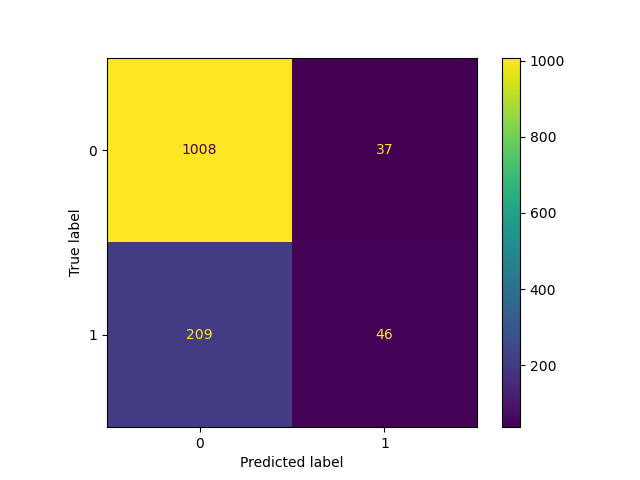

График Precision Recall:
График ROC:


<Figure size 640x480 with 0 Axes>

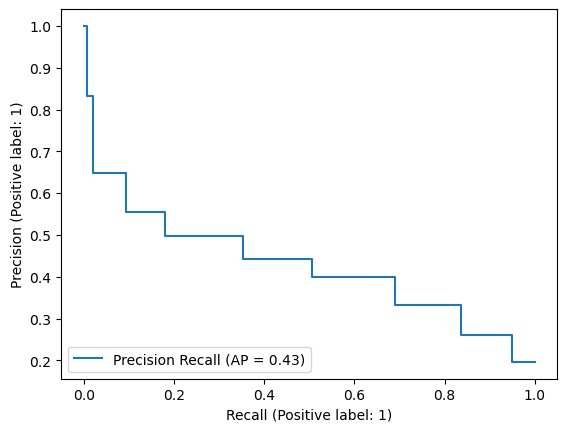

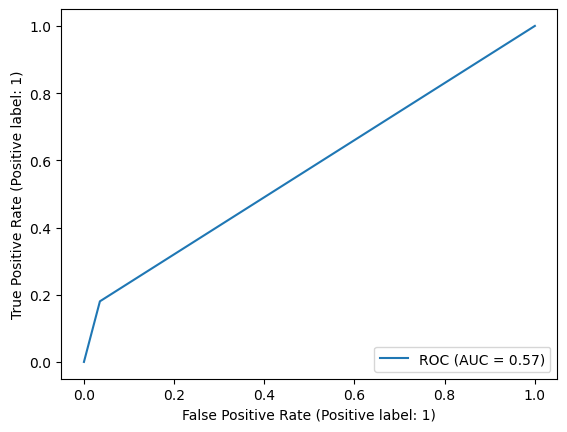

In [47]:
information(model, preprocessor.fit_transform(X_test), Y_test)

Кросс-валидация модели

In [48]:
mse = mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, Y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.43500663124919053
Оценки: [0.45573272 0.45573272 0.44635191 0.43983548 0.4674177 ]
Среднее: 0.4530141036121238
Стандартное отклонение: 0.009384096710236831


Получим лучшие показатели модели

In [49]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

grid_model = GridSearchCV(KNeighborsClassifier(n_neighbors=10), param_grid=param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_model.fit(data_num_transformed, Y_train)
grid_model_best = grid_model.best_estimator_
grid_model_best

Fitting 10 folds for each of 30 candidates, totalling 300 fits


KNeighborsClassifier(n_neighbors=2)

Сохраним модель в файл .pkl

In [50]:
file = open('models/knn.pkl', 'wb')
pickle.dump(grid_model_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

### SVM (Support Vector Machines)

In [51]:
from sklearn.svm import SVC

Создадим модель SVM

In [52]:
model = SVC()
model.fit(data_num_transformed, Y_train)
y_pred = model.predict(preprocessor.fit_transform(X_test))

Получим информацию о модели

Accuracy score:  0.8038461538461539
Recall score:  0.0
Precision score:  0.0
ROC AUC score:  0.5
Матрица ошибок: 


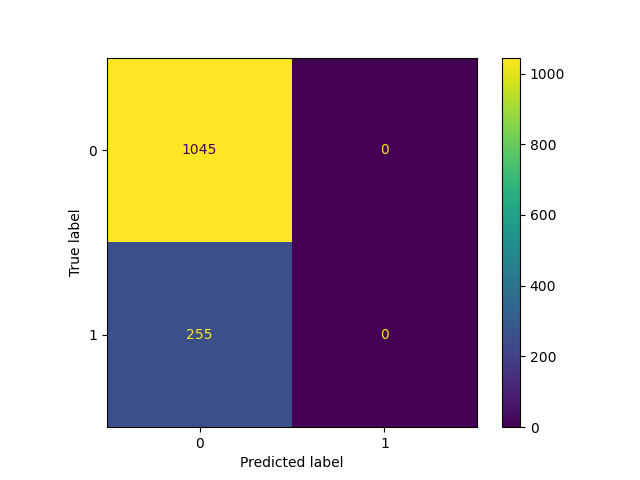

График Precision Recall:
График ROC:


<Figure size 640x480 with 0 Axes>

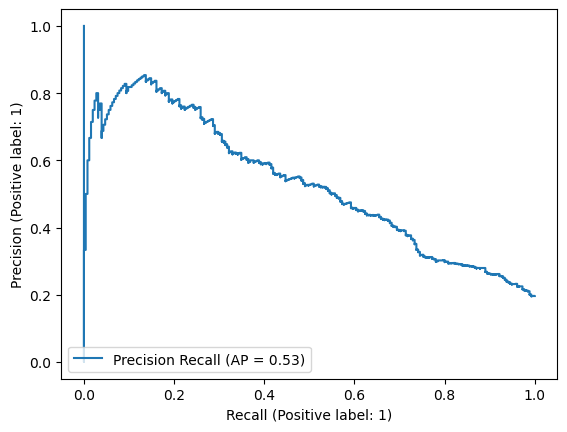

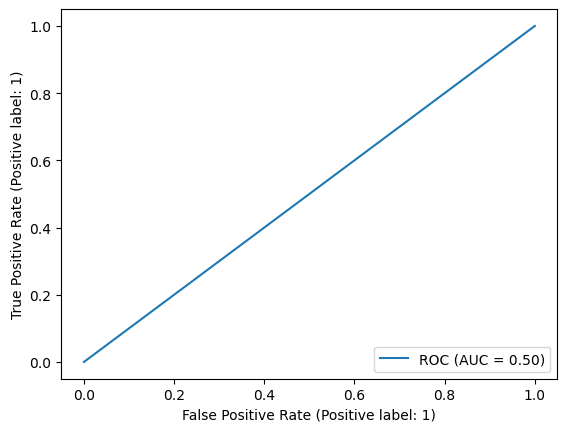

In [53]:
information(model, preprocessor.fit_transform(X_test), Y_test)

Кросс-валидация модели

In [54]:
mse = mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, Y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.4428925898610702
Оценки: [0.44397678 0.44397678 0.44310567 0.44310567 0.44310567]
Среднее: 0.4434541171490958
Стандартное отклонение: 0.0004267555904321151


Получим наилучшие показатели для модели

In [55]:
params = {'C': [1, 10], 'gamma': [0.001, 0.01, 1]}
grid_model = GridSearchCV(SVC(), param_grid=params).fit(data_num_transformed, Y_train)
grid_model_best = grid_model.best_estimator_
grid_model_best

SVC(C=1, gamma=1)

Сохраним модель в файл .pkl

In [56]:
file = open('models/svm.pkl', 'wb')
pickle.dump(grid_model_best, file, pickle.HIGHEST_PROTOCOL)
file.close()

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

Создадим модель Naive Bayes

In [58]:
model = GaussianNB()
model.fit(data_num_transformed, Y_train)
y_pred = model.predict(preprocessor.fit_transform(X_test))

Получим информацию о модели

Accuracy score:  0.7223076923076923
Recall score:  0.6666666666666666
Precision score:  0.3811659192825112
ROC AUC score:  0.7012759170653906
Матрица ошибок: 


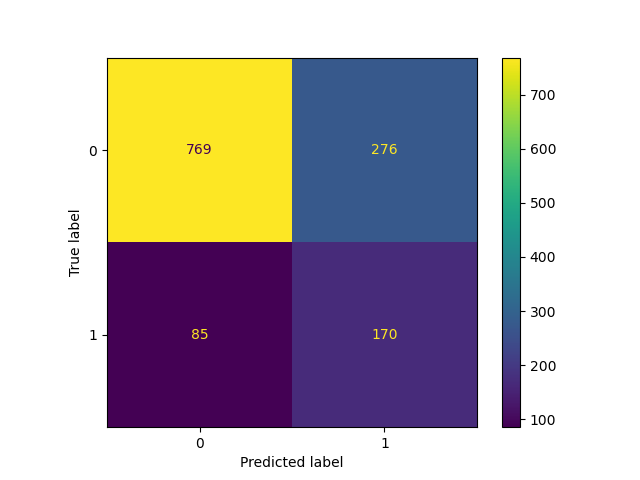

График Precision Recall:
График ROC:


<Figure size 640x480 with 0 Axes>

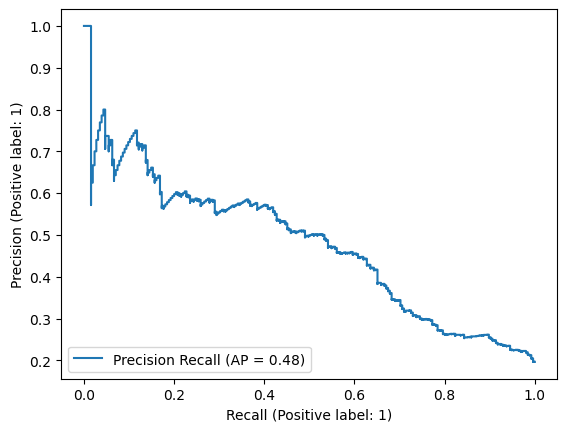

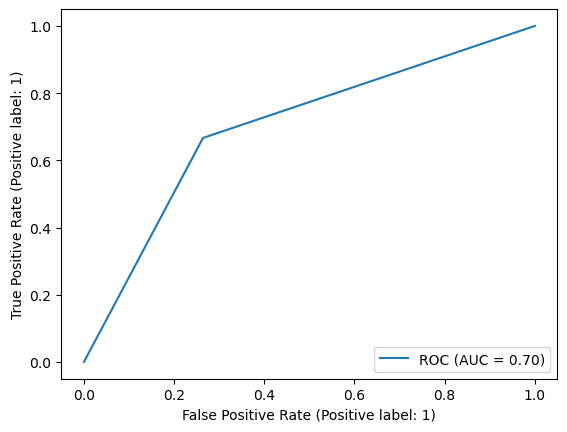

In [59]:
information(model, preprocessor.fit_transform(X_test), Y_test)

Кросс-валидация модели

In [60]:
mse = mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
scores = cross_val_score(model, data_num_transformed, Y_train, scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

0.5269651864139676
Оценки: [0.55122242 0.53529287 0.52189777 0.55669864 0.50120164]
Среднее: 0.5332626687713613
Стандартное отклонение: 0.020164274563903854


Получим наилучшие показатели данной модели

In [61]:
params = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

grid_model = GridSearchCV(GaussianNB(), param_grid=params).fit(data_num_transformed, Y_train)
grid_model_best = grid_model.best_estimator_
grid_model_best

GaussianNB(var_smoothing=1e-08)

In [62]:
file = open('models/naive_bayes.pkl', 'wb')
pickle.dump(grid_model_best, file, pickle.HIGHEST_PROTOCOL)
file.close()